# Predicting Employment of Students at an University Campus 
## Phase 2: Predictive Modeling
### Group 46
### Zhaojin Liu s3206722, Martin Thu s3494324, Klara Vickov s3873315

## Table of Contents
- [Introduction](#intro)
    - [Phase 1 Summary](#sum)
    - [Report Overview](#ro)
    - [Overview of Methodology](#om)
- [Predictive Modeling](#model)
    - [One-Hot Encoding and Scaling](#ohe)
    - [Feature Selection](#fs)
    - [Linear Regression](#lr)
    - [K Nearest Neighbors](#knn)
    - [Decision Tree](#dt)
    - [Random Forest](#rf)
    - [Naive Bayes](#nb)
    - [Model Comparison](#mc)
- [Critique and Limitations](#cl)
- [Summary and Conclusions](#sc)
    - [Project Summary](#ps)
    - [Summary of Findings](#sf)
    - [Conclusions](#con)
- [References](#ref)

## Introduction <a id='intro'></a>

### Phase 1 Summary <a id='sum'></a>
During phase 1 of the project, we pre-processed, explored, and visualized our chosen dataset that looks at academic information of students at Jain University in India and determines whether they received placement after university or not. 

The pre-processing involved checking for missing/incorrect values, outliers, changing feature names, and dropping ID-like columns. Then, we separated our target feature, status, from the descriptive features.

For exploring and visualizing, we looked at various one-variable, two-variable, and three-variable graphs and plots to determine what kind of relationships exist between features. Some interesting takeaways from our explorations were that male students have a higher chance of received placement, students with higher undergraduate and postgraduate GPAs are more likely to be placed, and a higher employability test percentage leads to higher chances of getting placed. A literature review backed up some of this data by showing that GPA, gender, and previous work experience contribute to higher employability for graduates.

We will load the dataset that was used in phase 1 of the project.

In [85]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) 

In [86]:
placement = pd.read_csv("placement_phase2.csv", sep = "\t", index_col = [0])
placement.head().style.set_precision(3)

,Gender,Secondary Education Percentage,Secondary Board of Education,Higher Secondary Education Percentage,Higher Secondary Board of Education,Higher Secondary Specialisation,Undergraduate Degree Percentage,Undergraduate Degree Type,Work Experience,Employability Test Percentage,Post Graduate Specialisation,MBA Grade Percentage,Status
1,M,67.000,Others,91.000,Others,Commerce,58.000,Sci&Tech,No,55.000,Mkt&HR,58.800,Placed
2,M,79.330,Central,78.330,Others,Science,77.480,Sci&Tech,Yes,86.500,Mkt&Fin,66.280,Placed
3,M,65.000,Central,68.000,Central,Arts,64.000,Comm&Mgmt,No,75.000,Mkt&Fin,57.800,Placed
4,M,56.000,Central,52.000,Central,Science,52.000,Sci&Tech,No,66.000,Mkt&HR,59.430,Not Placed
5,M,85.800,Central,73.600,Central,Commerce,73.300,Comm&Mgmt,No,96.800,Mkt&Fin,55.500,Placed


### Report Overview <a id='ro'></a>
For phase 2, we will begin by encoding categorical features, including the target feature, and scaling the necessary descriptive features. Then we will use feature selection to select the best descriptive features of the dataset. Next, we will fit K-Nearest Neighbors, Decision Tree, Random Forest, Linear Regression, and Naive Bayes models to our data, and compare the models to see which one is of best fit. Then we will critique our results before summarizing the whole project and drawing relevant conclusions.

### Overview of Methodology <a id='om'></a>

## Predictive Modeling <a id='model'></a>

### One-Hot Encoding and Scaling <a id='ohe'></a>
Before doing any modeling or feature selection, we must encoded all categorical features into numerical features so they can be modeled.

First, we will separate the target feature, status, from the rest of the descriptive features.

In [87]:
Data = placement.drop(columns='Status')
target = placement['Status']

We will encode the target feature first. Those that are placed will be encoded as 1 and those that are not placed will be encoded as 0. One thing to keep in mind here is that the two target classes are not balanced, with twice as many placed ('1') values as not placed ('0') values.

In [88]:
target = pd.get_dummies(target, drop_first = True)
target.value_counts()

Placed
1         148
0          67
dtype: int64

Next we will encode all the categorical features.

Here we print the levels of each categorical variable. Gender, Secondary Board of Education, Higher Secondary Board of Education, Work Experience, Post Graduate Specialisation are two-level variables and will be encoded as 1 or 0 in one variable. On the other hand, Higher Secondary Specialisation and Undergraduate Degree Type are three-level variables and will be encoded into three separate variables.

In [89]:
for col in Data.columns[Data.dtypes==object]:
    print(col)
    print(Data[col].value_counts(), "\n")

Gender
M    139
F     76
Name: Gender, dtype: int64 

Secondary Board of Education
Central    116
Others      99
Name: Secondary Board of Education, dtype: int64 

Higher Secondary Board of Education
Others     131
Central     84
Name: Higher Secondary Board of Education, dtype: int64 

Higher Secondary Specialisation
Commerce    113
Science      91
Arts         11
Name: Higher Secondary Specialisation, dtype: int64 

Undergraduate Degree Type
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: Undergraduate Degree Type, dtype: int64 

Work Experience
No     141
Yes     74
Name: Work Experience, dtype: int64 

Post Graduate Specialisation
Mkt&Fin    120
Mkt&HR      95
Name: Post Graduate Specialisation, dtype: int64 



In [90]:
cat_cols = Data.columns[Data.dtypes==object].to_list()

In [91]:
for col in cat_cols:
    if (Data[col].nunique() == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)

Data = pd.get_dummies(Data)

Below we can see that all the value have been properly encoded into 1 and 0. For Gender, Male is 1 and Female is 0. For Secondary Board of Education, Central is 1 and Others is 0. For Higher Secondary Board of Education, Others is 1 and Central is 0. For Work Experience, Yes is 1 and No is 0. For Post Graduate Specialisation, Mkt&Fin is 1 and Mkt&HR is 0.

In [92]:
for col in Data.columns:
    if Data[col].nunique() == 2 or Data[col].nunique() == 3:
        print(col)
        print(Data[col].value_counts(), "\n")

Gender
1    139
0     76
Name: Gender, dtype: int64 

Secondary Board of Education
0    116
1     99
Name: Secondary Board of Education, dtype: int64 

Higher Secondary Board of Education
1    131
0     84
Name: Higher Secondary Board of Education, dtype: int64 

Work Experience
0    141
1     74
Name: Work Experience, dtype: int64 

Post Graduate Specialisation
0    120
1     95
Name: Post Graduate Specialisation, dtype: int64 

Higher Secondary Specialisation_Arts
0    204
1     11
Name: Higher Secondary Specialisation_Arts, dtype: int64 

Higher Secondary Specialisation_Commerce
1    113
0    102
Name: Higher Secondary Specialisation_Commerce, dtype: int64 

Higher Secondary Specialisation_Science
0    124
1     91
Name: Higher Secondary Specialisation_Science, dtype: int64 

Undergraduate Degree Type_Comm&Mgmt
1    145
0     70
Name: Undergraduate Degree Type_Comm&Mgmt, dtype: int64 

Undergraduate Degree Type_Others
0    204
1     11
Name: Undergraduate Degree Type_Others, dtype: 

In [93]:
# Delete later
Data.sample(5, random_state=999).style.set_precision(3)

,Gender,Secondary Education Percentage,Secondary Board of Education,Higher Secondary Education Percentage,Higher Secondary Board of Education,Undergraduate Degree Percentage,Work Experience,Employability Test Percentage,Post Graduate Specialisation,MBA Grade Percentage,Higher Secondary Specialisation_Arts,Higher Secondary Specialisation_Commerce,Higher Secondary Specialisation_Science,Undergraduate Degree Type_Comm&Mgmt,Undergraduate Degree Type_Others,Undergraduate Degree Type_Sci&Tech
149,0,77.000,0,86.000,0,56.000,0,57.000,0,64.080,1,0,0,0,1,0
192,1,67.000,1,61.000,0,72.000,0,72.000,0,61.010,0,0,1,1,0,0
126,0,84.000,0,73.000,0,73.000,0,75.000,0,73.330,0,1,0,1,0,0
69,0,69.700,0,47.000,0,72.700,0,79.000,1,59.240,0,1,0,0,0,1
188,1,78.500,0,65.500,0,67.000,1,95.000,0,64.860,0,0,1,0,0,1


Now that the data is encoded, we will scale the descriptive features, so they are within the range of 0 to 1 to ensure equal weighting. We will store the column names as they will be needed to build up the new data frame with scaled features. Scaling will produce a NumPy array which does not include column names.

In [94]:
col_names = Data.columns

In [95]:
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler()
Data_scaled = data_scaler.fit_transform(Data)

We put the dataset back together using the NumPy array and the previously stored column names. We can see below that the features previously labeled 1 and 0 have stayed that way, and all other features now have values between 1 and 0.

In [96]:
Data_scaled = pd.DataFrame(Data_scaled, columns = col_names)
Data_scaled.sample(5, random_state = 999).style.set_precision(3)

,Gender,Secondary Education Percentage,Secondary Board of Education,Higher Secondary Education Percentage,Higher Secondary Board of Education,Undergraduate Degree Percentage,Work Experience,Employability Test Percentage,Post Graduate Specialisation,MBA Grade Percentage,Higher Secondary Specialisation_Arts,Higher Secondary Specialisation_Commerce,Higher Secondary Specialisation_Science,Undergraduate Degree Type_Comm&Mgmt,Undergraduate Degree Type_Others,Undergraduate Degree Type_Sci&Tech
148,0.000,0.744,0.000,0.807,0.000,0.146,0.000,0.146,0.000,0.482,1.000,0.000,0.000,0.000,1.000,0.000
191,1.000,0.538,1.000,0.395,0.000,0.537,0.000,0.458,0.000,0.367,0.000,0.000,1.000,1.000,0.000,0.000
125,0.000,0.889,0.000,0.593,0.000,0.561,0.000,0.521,0.000,0.829,0.000,1.000,0.000,1.000,0.000,0.000
68,0.000,0.594,0.000,0.165,0.000,0.554,0.000,0.604,1.000,0.301,0.000,1.000,0.000,0.000,0.000,1.000
187,1.000,0.775,0.000,0.470,0.000,0.415,1.000,0.938,0.000,0.512,0.000,0.000,1.000,0.000,0.000,1.000


To be certain that scaling has been done properly, we print out a summary of all columns. The min value is 0 and max value is 1 for each column, so scaling has been successful. 

In [97]:
Data_scaled.describe().style.set_precision(3)

,Gender,Secondary Education Percentage,Secondary Board of Education,Higher Secondary Education Percentage,Higher Secondary Board of Education,Undergraduate Degree Percentage,Work Experience,Employability Test Percentage,Post Graduate Specialisation,MBA Grade Percentage,Higher Secondary Specialisation_Arts,Higher Secondary Specialisation_Commerce,Higher Secondary Specialisation_Science,Undergraduate Degree Type_Comm&Mgmt,Undergraduate Degree Type_Others,Undergraduate Degree Type_Sci&Tech
count,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000
mean,0.647,0.544,0.460,0.483,0.609,0.399,0.344,0.460,0.442,0.415,0.051,0.526,0.423,0.674,0.051,0.274
std,0.479,0.223,0.500,0.180,0.489,0.179,0.476,0.277,0.498,0.219,0.221,0.501,0.495,0.470,0.221,0.447
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.406,0.000,0.394,0.000,0.268,0.000,0.208,0.000,0.252,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,0.538,0.000,0.461,1.000,0.390,0.000,0.438,0.000,0.404,0.000,1.000,0.000,1.000,0.000,0.000
75%,1.000,0.718,1.000,0.593,1.000,0.537,1.000,0.698,1.000,0.564,0.000,1.000,1.000,1.000,0.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### Feature Selection <a id='fs'></a>

### Linear Regression <a id='lr'></a>

### K Nearest Neighbors <a id='knn'></a>

### Decision Tree <a id='dt'></a>

In [98]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 999)

In [99]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits = 5,
                                   n_repeats = 3,
                                   random_state = 999)

In [100]:
scoring_metric = 'accuracy'

In [101]:
cv_results_full = cross_val_score(estimator = clf,
                                 X = Data,
                                 y = target,
                                 cv = cv_method,
                                 scoring = scoring_metric)
cv_results_full

array([0.79069767, 0.76744186, 0.76744186, 0.74418605, 0.86046512,
       0.79069767, 0.81395349, 0.72093023, 0.76744186, 0.81395349,
       0.81395349, 0.74418605, 0.79069767, 0.74418605, 0.76744186])

In [102]:
cv_results_full.mean().round(3)

0.78

The accuracy of the model in consideration of all variables is 78%

In [103]:
num_features = 5

In [104]:
from sklearn import feature_selection as fs
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

array([1, 3, 5, 6, 8])

In [143]:
best_features_fscore = Data_scaled.columns[fs_indices_fscore].values
best_features_fscore

array(['Secondary Education Percentage',
       'Higher Secondary Education Percentage',
       'Undergraduate Degree Percentage', 'Work Experience',
       'Post Graduate Specialisation'], dtype=object)

In [144]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([124.84250634,  67.74518757,  63.71917614,  17.57165962,
        14.27951129])

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

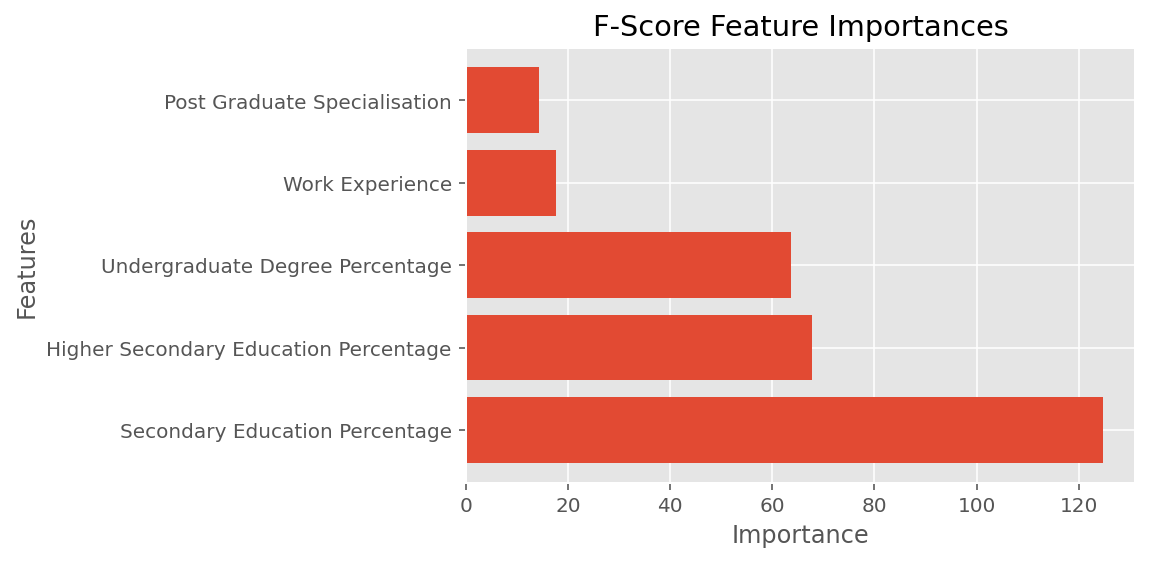

In [146]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

From the observation of the F-score, it can be seen that Work Experience and Undergrade Degree percentage importantance is less than 20. However, to prevent underfitting the model the 5 features will be kept.

In [147]:
Df_numpy = pd.DataFrame(Data_scaled).to_numpy()
Df_numpy[:, fs_indices_fscore].shape

(215, 5)

In [148]:
cv_results_fscore = cross_val_score(estimator=clf,
                             X=Df_numpy[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.788

### DT fit and tuning

In [149]:
data_DT_fs = Data_scaled[['Work Experience', 'Undergraduate Degree Percentage','Post Graduate Specialisation',
                          'Higher Secondary Education Percentage', 'Secondary Education Percentage']]

In [152]:
from sklearn.model_selection import train_test_split
D_train, D_test, t_train, t_test = train_test_split(data_DT_fs, target, test_size =0.3,stratify=target, random_state=999)

In [153]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=4,
                                       criterion='entropy',
                                       random_state = 999)

In [154]:
dt_classifier.fit(D_train, t_train);

In [155]:
dt_classifier.score(D_test, t_test)

0.7076923076923077

The decision tree predicts the correct labels on the test set with an accuracy rate of 70.76%

In [171]:
from sklearn.model_selection import GridSearchCV
df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6,7,8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(data_DT_fs, target);

Fitting 15 folds for each of 32 candidates, totalling 480 fits


In [169]:
gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [170]:
gs_DT.best_score_.round(3)

0.825

In [162]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

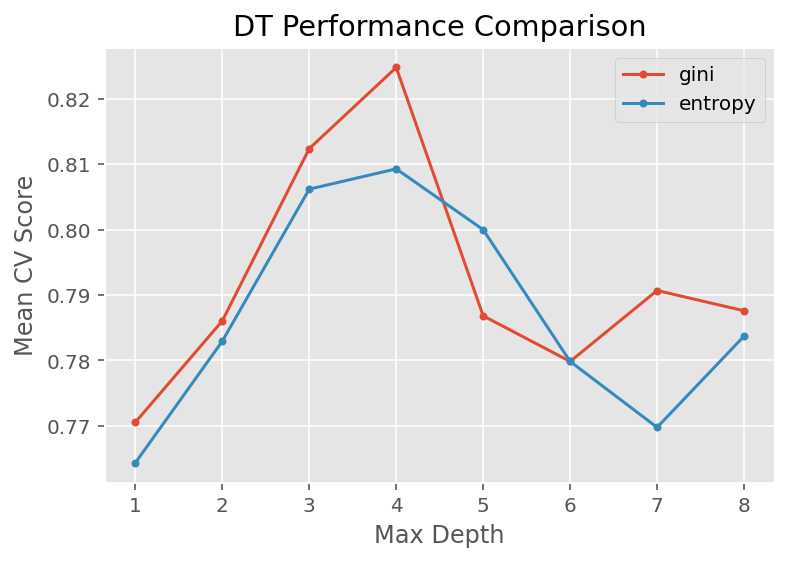

In [163]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

It is observed that the best set of hyperparameters as follows: Gini split criterion with maximum depth of 4 with
min_sample_split value of 2

### Random Forest <a id='rf'></a>

Using the selected features from Decision tree modeling:

In [227]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, random_state = 999)

In [228]:
rf_classifier.fit(D_train, t_train);

In [229]:
rf_classifier.score(D_test, t_test)

0.8461538461538461

In [261]:
param_rf = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5,6,7,8],
    'max_features': [2, 3],
    'min_samples_leaf': [5],
    'min_samples_split': [2],
    'n_estimators': [20]
}

Explicitly specify combinations to analyse the hyper parameters. Depth was set from 1 incrementing towards 8 to define the longest path between the root node and leaf note. The max features were set to 2-3 provided to each tree, minimum number of samples present in each node after splitting was set at 5, minimum required of observations in any given node was set at 2 in order to split and number of trees was set at 20.


In [262]:
gs_rf = GridSearchCV(estimator = rf_classifier, param_grid = param_rf, 
                          cv = cv_method, verbose = 1,scoring='accuracy')

In [263]:
gs_rf.fit(D_train, t_train)

Fitting 15 folds for each of 32 candidates, totalling 480 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=RandomForestClassifier(n_estimators=20,
                                              random_state=999),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': [2, 3], 'min_samples_leaf': [5],
                         'min_samples_split': [2], 'n_estimators': [20]},
             scoring='accuracy', verbose=1)

In [264]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 20}

In [265]:
gs_rf.best_score_.round(3)

0.862

In [266]:
results_rf = pd.DataFrame(gs_rf.cv_results_['params'])
results_rf['test_score'] = gs_rf.cv_results_['mean_test_score']
results_rf.columns

Index(['criterion', 'max_depth', 'max_features', 'min_samples_leaf',
       'min_samples_split', 'n_estimators', 'test_score'],
      dtype='object')

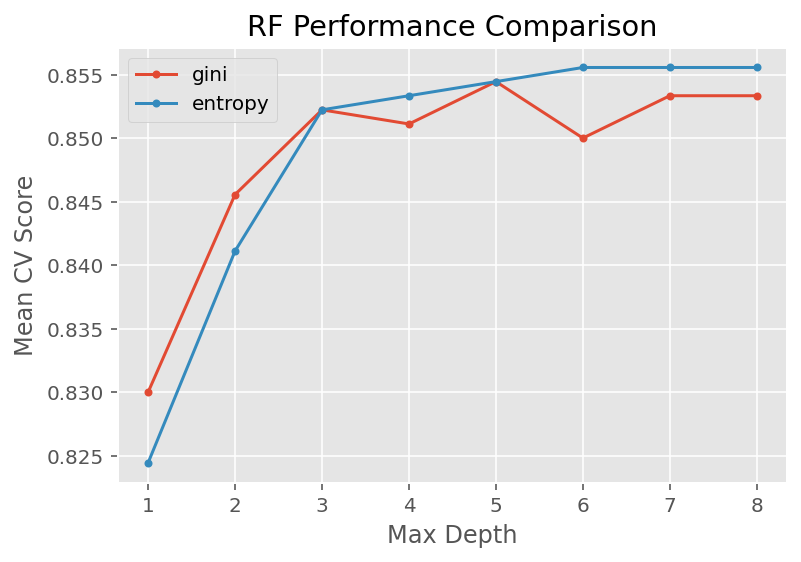

In [269]:
for i in ['gini', 'entropy']:
    temp = results_rf[results_rf['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("RF Performance Comparison")
plt.show()

The highest accuracy can be seen at depth 6 for entrophy while gini highest accuracy occurs at depth 5

### Naive Bayes <a id='nb'></a>

### Model Comparison <a id='mc'></a>

## Critique and Limitations <a id='cl'></a>

## Summary and Conclusions <a id='sc'></a>

### Project Summary <a id='ps'></a>

### Summary of Findings <a id='sf'></a>

### Conclusions <a id='con'></a>

## References <a id='ref'></a>